In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  
import matplotlib.dates as mdates
import numpy as np

In [10]:
plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (10, 6)
})

In [11]:
df = pd.read_csv('netflix_titles.csv')

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['country'].fillna('Unknown')
df.dropna(subset=['rating', 'date_added','duration'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['quarter_added'] = df['date_added'].dt.quarter
df['recency'] = df['year_added'] - df['release_year']

In [19]:
df['duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract(r'([a-zA-Z]+)')

In [20]:
df['genres'] = df['listed_in'].str.split(', ')
df['genre_count'] = df['genres'].apply(len)
genres_expanded = df.explode('genres')
genres_expanded['genre_weight'] = 1 / genres_expanded['genre_count']

In [21]:
df['multi_country'] = df['country'].str.contains(', ', na=False)
genres_expanded['multi_country'] = genres_expanded['country'].str.contains(', ', na=False)

In [22]:
print("\nDuplicate show_id count:", df['show_id'].duplicated().sum())


Duplicate show_id count: 0


In [23]:
print("\nCleaned Dataset Info:")
print(df.info())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  year_added        8709 non-null   float64       
 13  month_added       8709 non-null   object        
 14  q

In [24]:
# Numerical summaries
df[['release_year', 'year_added', 'duration_numeric', 'recency']].describe()

,release_year,year_added,duration_numeric,recency
count,8807.000000,8709.000000,8804.000000,8709.000000
mean,2014.180198,2018.887932,69.846888,4.690894
std,8.819312,1.567961,50.814828,8.792208
min,1925.000000,2008.000000,1.000000,-3.000000
25%,2013.000000,2018.000000,2.000000,0.000000
50%,2017.000000,2019.000000,88.000000,1.000000
75%,2019.000000,2020.000000,106.000000,5.000000
max,2021.000000,2021.000000,312.000000,93.000000


In [25]:
print("\nCategorical Unique Counts:")
print(f"Content Types: {df['type'].nunique()} - {df['type'].unique()}")
print(f"Countries: {df['country'].nunique()}")
print(f"Ratings: {df['rating'].nunique()} - {df['rating'].unique()}")
print(f"Genres: {genres_expanded['genres'].nunique()}")


Categorical Unique Counts:
Content Types: 2 - ['Movie' 'TV Show']
Countries: 748
Ratings: 17 - ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
Genres: 42


In [26]:
# Weighted genre prevalence
genre_weights = genres_expanded.groupby('genres')['genre_weight'].sum().sort_values(ascending=False)
print("\nTop 5 Weighted Genres:")
print(genre_weights.head())


Top 5 Weighted Genres:
genres
International Movies      1083.500000
Dramas                    1027.166667
Comedies                   732.666667
Documentaries              594.166667
International TV Shows     505.500000
Name: genre_weight, dtype: float64


In [27]:
print("\nMulti-Country Production Counts:")
print(df['multi_country'].value_counts())


Multi-Country Production Counts:
multi_country
False    7491
True     1316
Name: count, dtype: int64


In [28]:
numeric_cols = ['release_year', 'year_added', 'duration_numeric', 'recency']
correlation_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  release_year  year_added  duration_numeric   recency
release_year          1.000000    0.110473         -0.249182 -0.984167
year_added            0.110473    1.000000          0.016436  0.067434
duration_numeric     -0.249182    0.016436          1.000000  0.259009
recency              -0.984167    0.067434          0.259009  1.000000


In [29]:
movies = df[df['type'] == 'Movie']['duration_numeric'].dropna()
tv_shows = df[df['type'] == 'TV Show']['duration_numeric'].dropna()

In [30]:
def skewness(x):
    return ((x - x.mean())**3).mean() / (x.std()**3)

stats = {
    'Movies': {
        'Mean': np.mean(movies),
        'Median': np.median(movies),
        'IQR': np.percentile(movies, 75) - np.percentile(movies, 25),
        'Skewness': skewness(movies)
    },
    'TV Shows': {
        'Mean': np.mean(tv_shows),
        'Median': np.median(tv_shows),
        'IQR': np.percentile(tv_shows, 75) - np.percentile(tv_shows, 25),
        'Skewness': skewness(tv_shows)
    }
}
print("\nDuration Statistics (Movies vs. TV Shows):")
print(pd.DataFrame(stats))


Duration Statistics (Movies vs. TV Shows):
             Movies  TV Shows
Mean      99.577187  1.764948
Median    98.000000  1.000000
IQR       27.000000  1.000000
Skewness   0.202480  3.414735


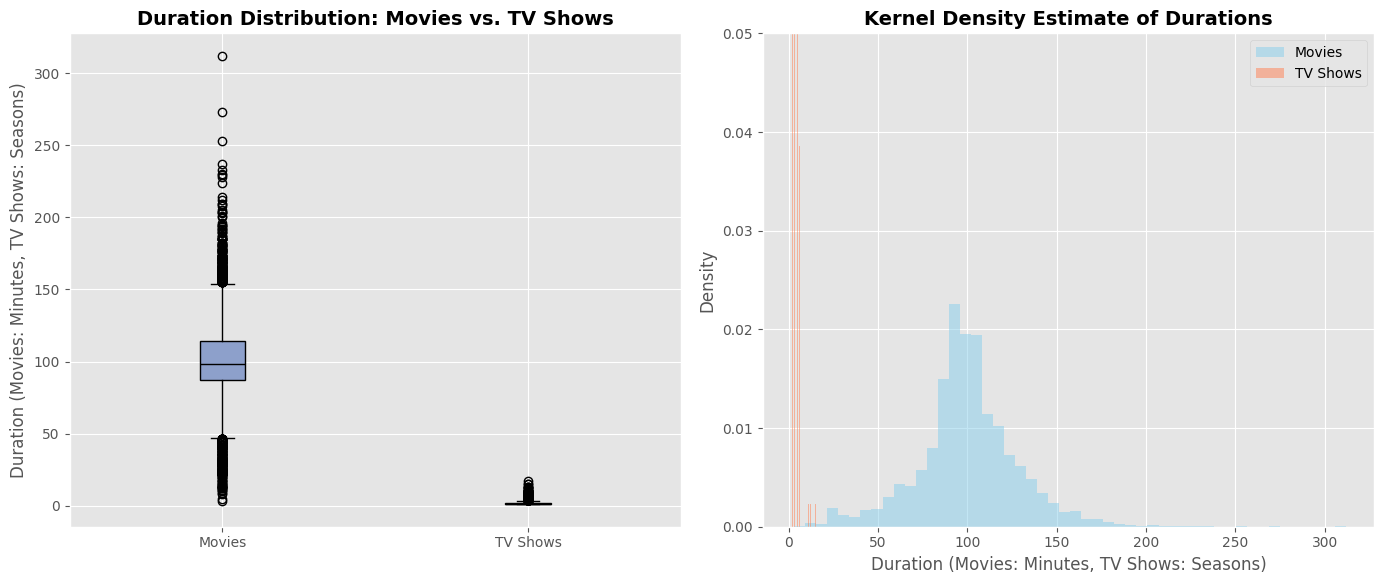

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Box plot
ax1.boxplot([movies, tv_shows], labels=['Movies', 'TV Shows'], patch_artist=True,
            boxprops=dict(facecolor=cm.Set2(0.3)), medianprops=dict(color='black'))
ax1.set_title('Duration Distribution: Movies vs. TV Shows', fontsize=14, weight='bold')
ax1.set_ylabel('Duration (Movies: Minutes, TV Shows: Seasons)', fontsize=12)

bins = 50
ax2.hist(movies, bins=bins, density=True, alpha=0.5, label='Movies', color='skyblue')  # Changed color
ax2.hist(tv_shows, bins=bins, density=True, alpha=0.5, label='TV Shows', color='coral')  # Changed color
ax2.set_title('Kernel Density Estimate of Durations', fontsize=14, weight='bold')
ax2.set_xlabel('Duration (Movies: Minutes, TV Shows: Seasons)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_ylim(0, 0.05)  
ax2.legend()
plt.tight_layout()
plt.show()



In [32]:
q1, q3 = np.percentile(movies, [25, 75])
iqr = q3 - q1
movie_outliers = movies[(movies < q1 - 1.5 * iqr) | (movies > q3 + 1.5 * iqr)]
print("\nMovie Duration Outliers (minutes):")
print(movie_outliers.describe())

genre_country = genres_expanded.pivot_table(
    values='genre_weight', index='genres', columns='country', aggfunc='sum'
).fillna(0)
top_countries = df['country'].value_counts().index[:5]
print("\nGenre-Country Matrix (Top 5 Countries):")
print(genre_country[top_countries].head())


Movie Duration Outliers (minutes):
count    450.000000
mean      94.715556
std       72.595465
min        3.000000
25%       28.250000
50%       45.500000
75%      164.000000
max      312.000000
Name: duration_numeric, dtype: float64

Genre-Country Matrix (Top 5 Countries):
country                   United States      India  United Kingdom      Japan  \
genres                                                                          
Action & Adventure           144.333333  45.500000       11.500000  16.166667   
Anime Features                 0.333333   0.000000        0.000000  20.166667   
Anime Series                   4.333333   0.000000        0.000000  61.333333   
British TV Shows               1.833333   0.666667       71.333333   0.000000   
Children & Family Movies     165.500000  11.333333        5.333333   4.333333   

country                   South Korea  
genres                                 
Action & Adventure                5.0  
Anime Features                    0.

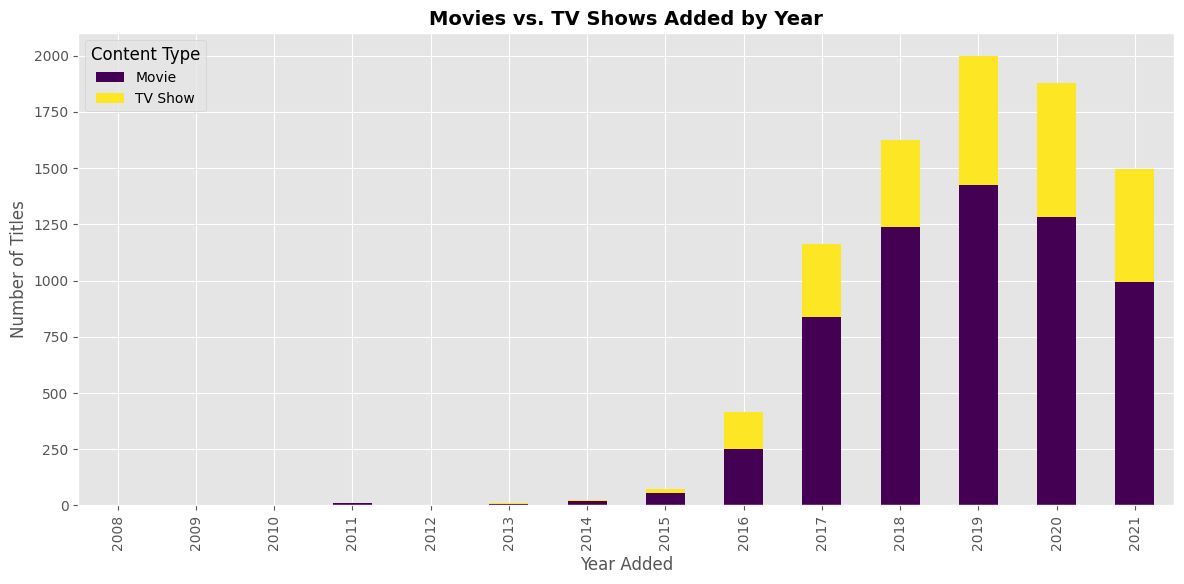

In [65]:
# Visualization 1: Content Type Over Time (Stacked Bar)
year_type_counts = df.groupby(['year_added', 'type'])['show_id'].count().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(12, 6))
year_type_counts.plot(kind='bar', stacked=True, ax=ax, cmap=cm.viridis)
ax.set_title('Movies vs. TV Shows Added by Year', fontsize=14, weight='bold')
ax.set_xlabel('Year Added', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.legend(title='Content Type', loc='upper left')
plt.tight_layout()
plt.show()

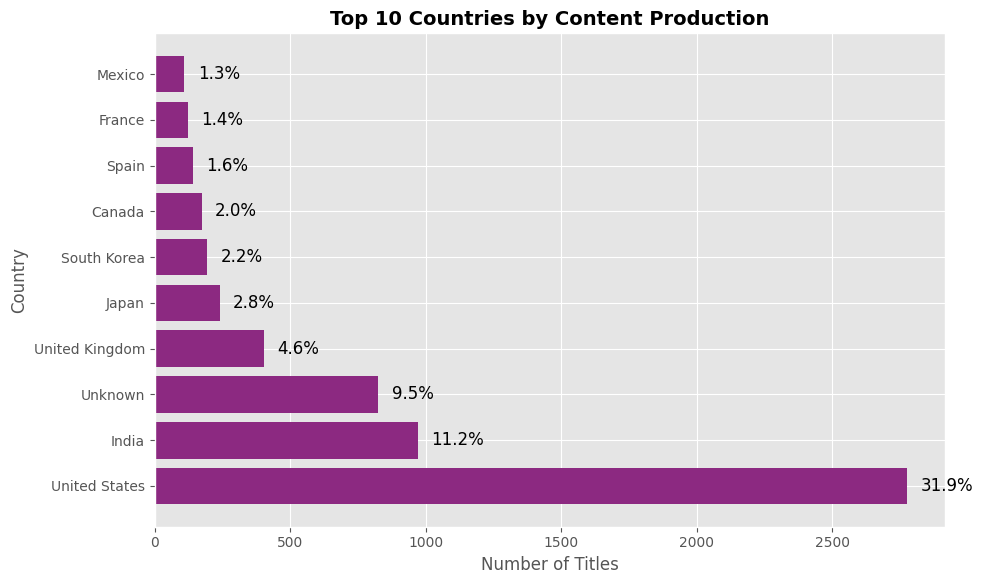

In [66]:
# Visualization 2: Top Countries (Horizontal Bar with Annotations)
top_countries = df['country'].value_counts().head(10)
total_titles = len(df)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries.index, top_countries.values, color=cm.magma(0.4))
for bar in bars:
    width = bar.get_width()
    ax.text(width + 50, bar.get_y() + bar.get_height()/2, f'{width/total_titles:.1%}',
            ha='left', va='center')
ax.set_title('Top 10 Countries by Content Production', fontsize=14, weight='bold')
ax.set_xlabel('Number of Titles', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

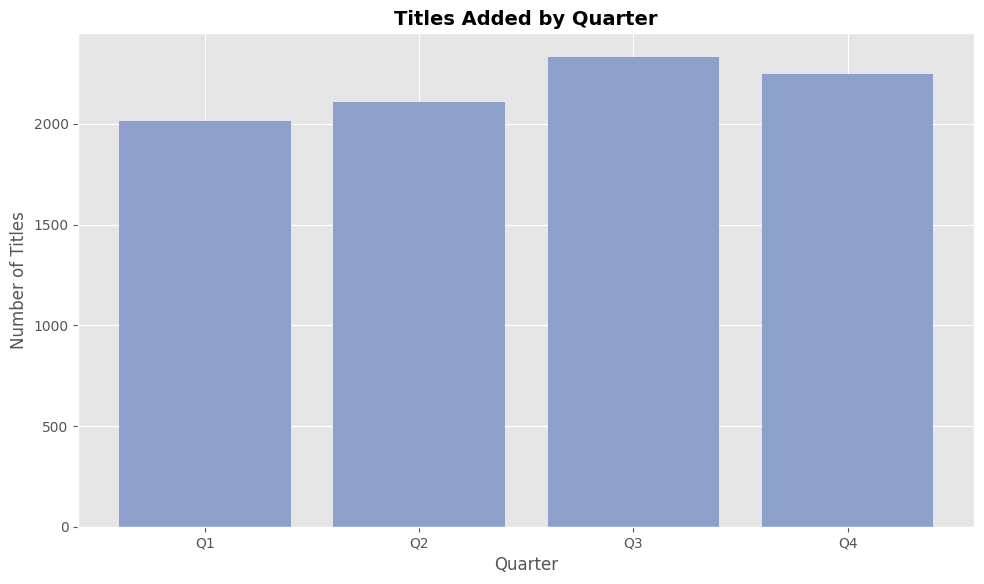

In [67]:
quarter_counts = df.groupby('quarter_added')['show_id'].count()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(quarter_counts.index, quarter_counts.values, color=cm.Set2(0.3))
ax.set_title('Titles Added by Quarter', fontsize=14, weight='bold')
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.show()

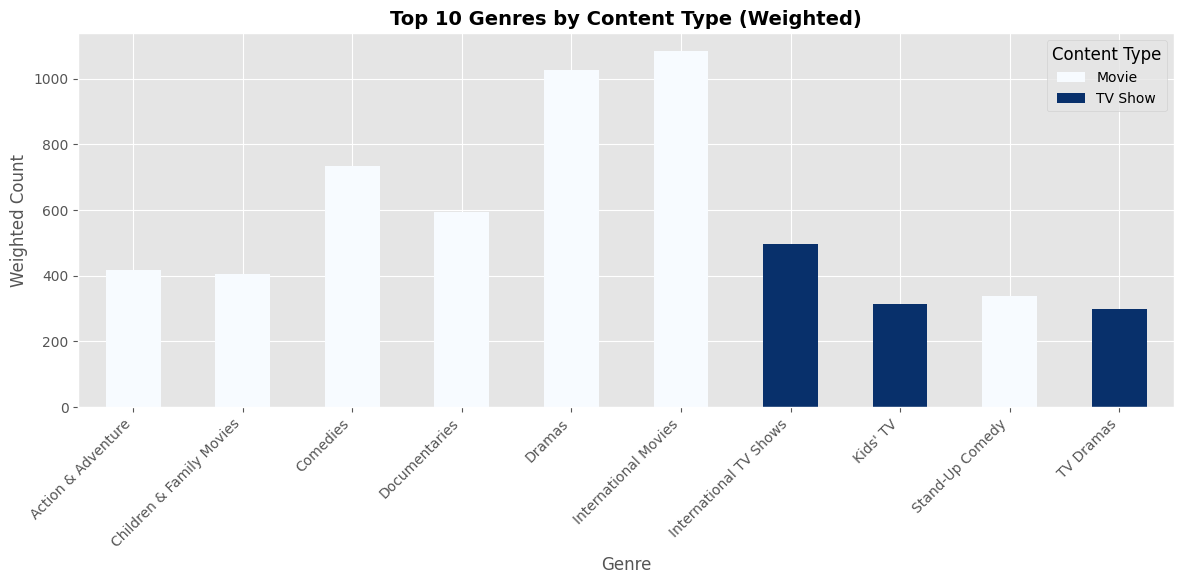

In [68]:
# Visualization 4: Top Genres by Content Type (Stacked Bar)
top_genres = genres_expanded.groupby('genres')['genre_weight'].sum().sort_values(ascending=False).head(10).index
genre_type_weights = genres_expanded[genres_expanded['genres'].isin(top_genres)].groupby(['genres', 'type'])['genre_weight'].sum().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(12, 6))
genre_type_weights.plot(kind='bar', stacked=True, ax=ax, cmap=cm.Blues)
ax.set_title('Top 10 Genres by Content Type (Weighted)', fontsize=14, weight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Weighted Count', fontsize=12)
ax.legend(title='Content Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

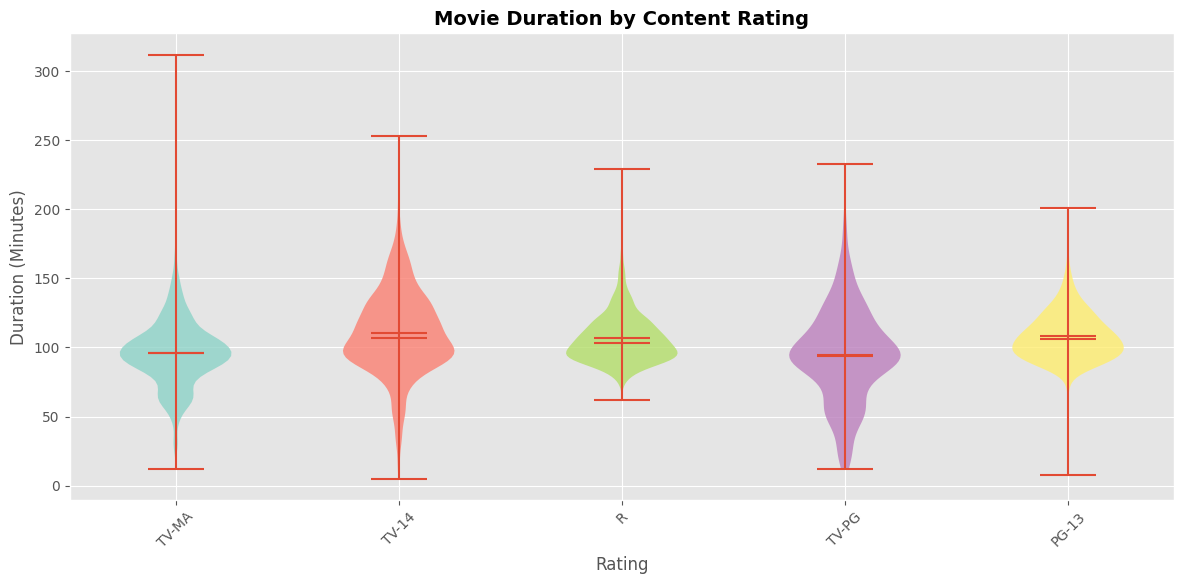

In [69]:
# Visualization 5: Movie Duration by Rating (Violin Plot)
movies = df[df['type'] == 'Movie']
ratings_order = movies['rating'].value_counts().index[:5]
fig, ax = plt.subplots(figsize=(12, 6))
parts = ax.violinplot([movies[movies['rating'] == r]['duration_numeric'].dropna() for r in ratings_order],
                      showmeans=True, showmedians=True)
for pc, color in zip(parts['bodies'], cm.Set3(np.linspace(0, 1, len(ratings_order)))):
    pc.set_facecolor(color)
    pc.set_alpha(0.8)
ax.set_xticks(range(1, len(ratings_order) + 1))
ax.set_xticklabels(ratings_order)
ax.set_title('Movie Duration by Content Rating', fontsize=14, weight='bold')
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Duration (Minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

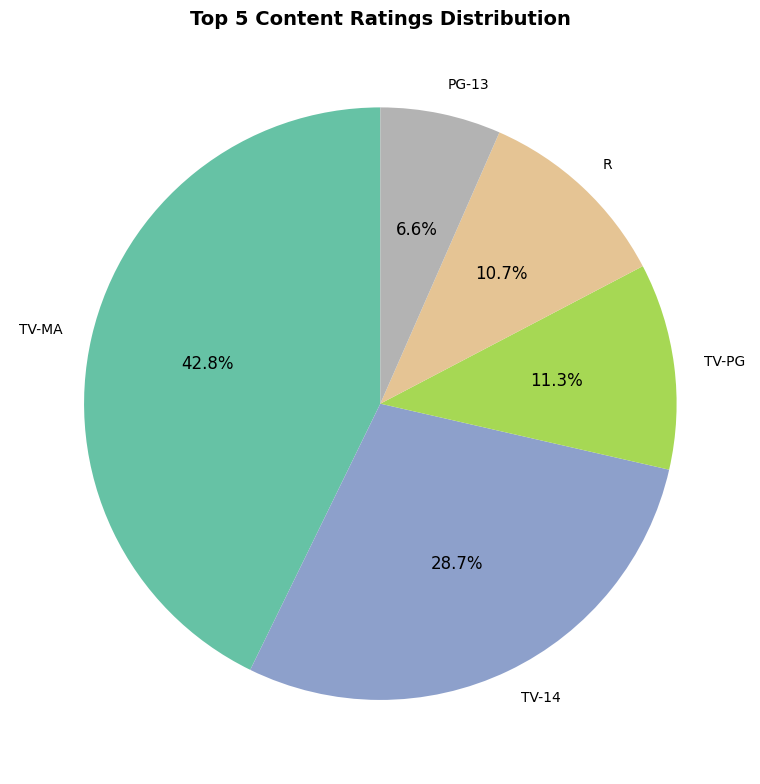

In [70]:
# Visualization 6: Rating Distribution (Pie Chart)
rating_counts = df['rating'].value_counts().head(5)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%',
       colors=cm.Set2(np.linspace(0, 1, 5)), startangle=90)
ax.set_title('Top 5 Content Ratings Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

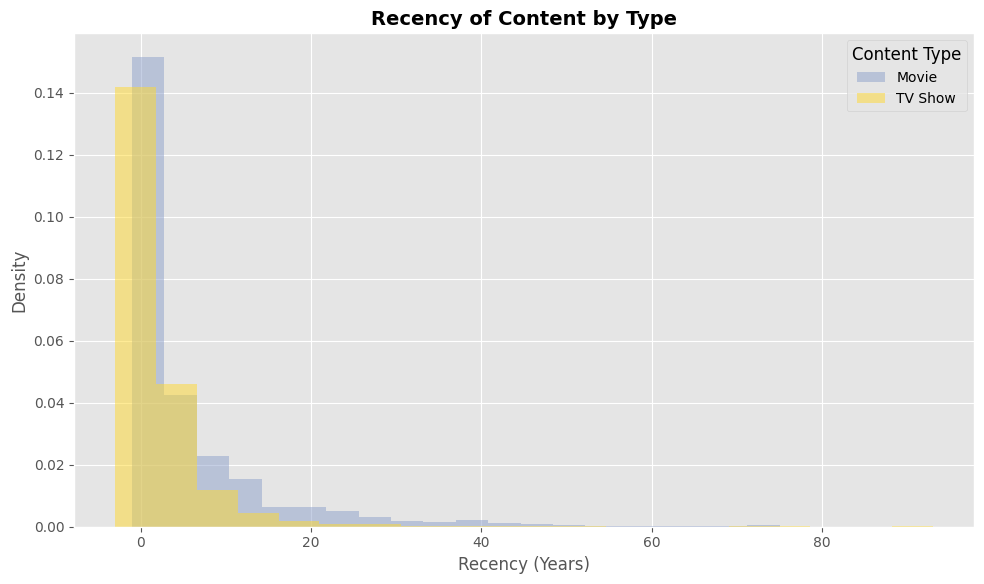

In [71]:
# Visualization 7: Recency Distribution (Histogram)
fig, ax = plt.subplots(figsize=(10, 6))
for t in ['Movie', 'TV Show']:
    ax.hist(df[df['type'] == t]['recency'].dropna(), bins=20, alpha=0.5, label=t, density=True,
            color=cm.Set2(0.3 if t == 'Movie' else 0.7))
ax.set_title('Recency of Content by Type', fontsize=14, weight='bold')
ax.set_xlabel('Recency (Years)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(title='Content Type')
plt.tight_layout()
plt.show()

In [75]:

df.to_csv('netflix_cleaned.csv', index=False)



genres_expanded.to_csv('netflix_genres_expanded.csv', index=False)
